In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import signac
#import gsd
import freud


from scipy.optimize import curve_fit, minimize
from sklearn.linear_model import *
import matplotlib.pylab as pl








In [2]:


def compute_free_OHs(vs, vals, allfields):
    hfields = []

    for ft,u in enumerate(vs):
        print(u)
        vt = np.where((vals[:, 0] == u))

        fields = np.concatenate(allfields[vt])
        hfields.append(fields)
    
    labels = ['x<2 A', '2<x<6 A', '6<x<10 A', 'Bulk Sample 1', 'Bulk Sample 2']
    for i in range(5):
        frac_freeOHs = len(hfields[2*i+1]) / (len(hfields[2*i]) + len(hfields[2*i + 1]))
        print('Fraction of free OHs for {} = '.format(labels[i]), frac_freeOHs)
        
def compute_fields(vs, vals, allfields):
    
    sortfields = []
    for ft,u in enumerate(vs):#, 10.000003]:
        vt = np.where((vals[:, 0] == u))



        activities = np.concatenate(allacts[vt])
        freqs = np.concatenate(allfreqs[vt])
        fields = np.concatenate(allfields[vt])

        sortfields.append(fields)



    sortfields = np.array(sortfields, dtype='object')

    probfields = []
    labels = ['No free OH', "Free OH"]
    for i in [0, 1]:
        fields = sortfields[i]
        bina, bins = np.histogram(-fields, range=(-5, 1), bins=61)
        binw = bins[1] - bins[0]


        bins = bins[:-1] + binw/2
        plt.plot(bins, bina / binw / np.sum(bina), label=labels[i])

        probfields.append(bina)

    bulkfields = np.concatenate(sortfields[[6, 7, 8, 9]])


    bina, bins = np.histogram(-bulkfields, range=(-5, 1), bins=61)

    bins = bins[:-1] + binw/2
    plt.plot(bins, bina / binw / np.sum(bina), label='bulk fields')
    plt.legend()

    probfields.append(bina)
    
    probfields.insert(0, bins)

    
    return probfields


def sort_spectra(vs, vals, allfreqs, allacts):
    

    sig = 29.72399 # Width of smoothing Gaussain
    combos = []
    fs = 15



    alts = []
    for ft,u in enumerate(vs):


        vt = np.where((vals[:, 0] == u))
        activities = np.concatenate(allacts[vt])
        freqs = np.concatenate(allfreqs[vt])


        plt.figure(1)
        xx = np.round(np.linspace(900, 4000, 621))
        iso = [[],[],[],[]]
        for x in xx:
            for j in range(4):
                wh = np.where(np.abs(freqs[:,j] - x) < 2.5)
                vv = np.sum(activities[wh][:,j])
                #iso[j].append(vv)
                dis = np.abs(freqs[:,j] - x)
                inten = np.sum(np.exp(-(dis/sig)**2)*activities[:,j])
                iso[j].append(inten)

        iso = np.asarray(iso)
        plt.title('Isotropic')
        plt.plot(xx, np.sum(iso, axis=0))
        plt.xlim(3000, 3800)
        plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
        plt.ylabel('Intensity', size=fs)
        plt.xticks(size=fs)
        plt.yticks(size=fs)

        plt.figure(2)
        aniso = [[],[],[],[]]
        
        for x in xx:
            for j in range(4):
                wh = np.where(np.abs(freqs[:,j] - x) < 2.5)
                vv = np.sum(activities[wh][:,j+4])

                dis = np.abs(freqs[:,j] - x)
                inten = np.sum(np.exp(-(dis/sig)**2)*activities[:,j+4])
                aniso[j].append(inten)


        aniso = np.asarray(aniso)
        plt.title('Anisotropic')

        plt.plot(xx, np.sum(aniso, axis=0)/np.max(np.sum(aniso, axis=0)[:200]))
        plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
        plt.ylabel('Intensity', size=fs)
        plt.xticks(size=fs)
        plt.yticks([], size=fs)
        plt.xlim(2900, 3800)

        plt.figure(3)
        plt.title('Unpolarized')

        combo = np.sum(aniso*21/90 + iso/9, axis=0)
        plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
        plt.ylabel('Intensity', size=fs)
        plt.xticks(size=fs)
        plt.yticks([], size=fs)
        plt.plot(xx, combo/np.max(combo[:540]), linewidth = 1)
        plt.xlim(2900, 3800)
        print(ft)
        combos.append([xx, np.sum(iso, axis=0), np.sum(aniso, axis=0), combo])
        
    return combos



    






In [3]:
vals = np.load("amoeba_spectra_nofield/vals.npy", allow_pickle=True) # Identifiers for 1) interfacial distance + 2) free OH.
allacts = np.load("amoeba_spectra_nofield/activities.npy", allow_pickle=True) # Raman ativities
allfreqs = np.load("amoeba_spectra_nofield/frequencies.npy", allow_pickle=True) # Raman Frequencies
allfields = np.load("amoeba_spectra_nofield/fields.npy", allow_pickle=True) # Fields used in specific Raman calculation

In [4]:


vs = [
      -2, #No free OH, x< 2 A of WCI
      98, #Free OH, x< 2 A of WCI
      2, #No free OH, 6 C >x> 2 A of WCI
      102, #Free OH, 6 C >x> 2 A of WCI
     6, #No free OH, 10 C >x> 6 A of WCI
      106, #Free OH, 10 C >x> 6 A of WCI
     196, #No free OH, bulk
     296, #Free OH, bulk
     200, #No free OH, bulk, more data
     300 #Free OH, bulk, more data
        ]

compute_free_OHs(vs, vals, allfields)

-2
98
2
102
6
106
196
296
200
300
Fraction of free OHs for x<2 A =  0.26028982823278857
Fraction of free OHs for 2<x<6 A =  0.025300577803280003
Fraction of free OHs for 6<x<10 A =  0.023024285522608344
Fraction of free OHs for Bulk Sample 1 =  0.02490640223189118
Fraction of free OHs for Bulk Sample 2 =  0.023713762631723104


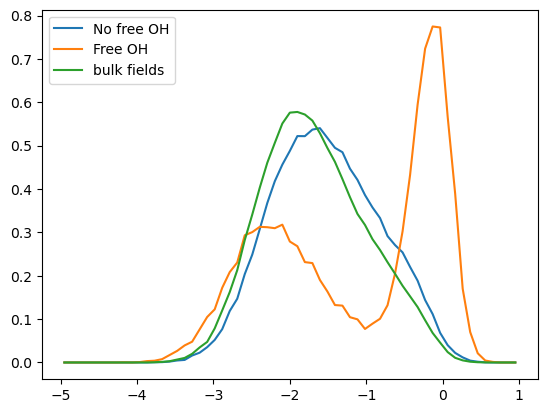

In [5]:

#What the fields look like
      
    
probfields = compute_fields(vs, vals, allfields)




0
1
2
3
4
5
6
7
8
9


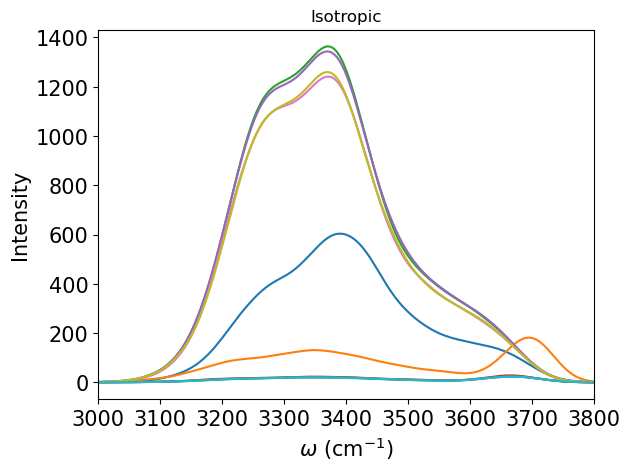

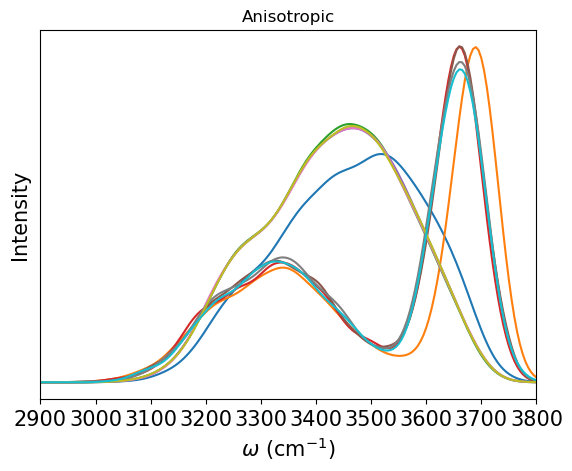

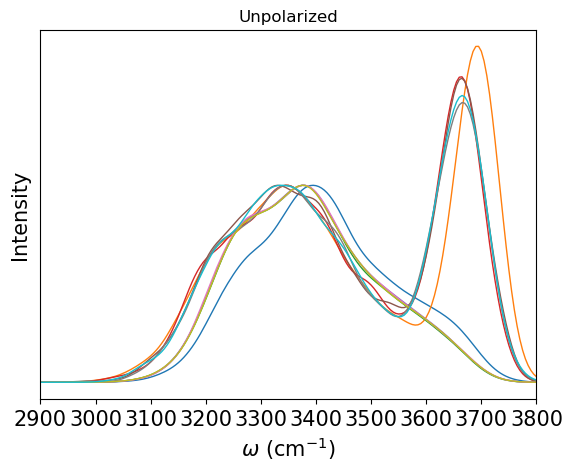

In [6]:
# Generating Isotropic, Anisotropic, and Unpolarized Raman from activities and frequencies

combos = sort_spectra(vs, vals, allfreqs, allacts)

Text(0, 0.5, 'Intensity')

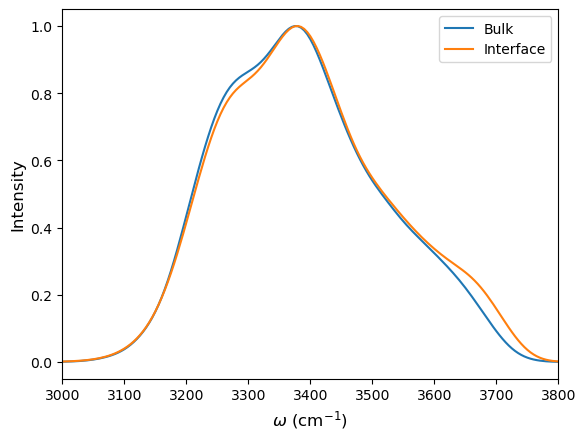

In [7]:
fs = 12
collect = [] # To this, I add 1) spectra by distance, 2) bulk spectra, and 3), Interface spectra. 

collect.append(combos[0][0])

for i in range(3):
    collect.append(combos[2*i][3] + combos[2*i+1][3])# Spectra by distance


collect.append(combos[6][3] + combos[7][3] + combos[8][3] + combos[9][3]) #Bulk
collect.append(combos[0][3] + 
               combos[1][3] + 
               combos[2][3] + 
               combos[3][3] + 
               combos[4][3] + 
               combos[5][3])#Interface


collect = np.array(collect)

plt.xlim(3000, 3800)
collect[1:] = (collect[1:].T / np.sum(collect[1:, 300:], axis=1)).T


labels = ['Bulk', 'Interface']

it = 0
for i in range(4, 6):
    plt.plot(collect[0], collect[i]/np.max(collect[i]), label=labels[it])
    it +=1
    
plt.legend()

plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)


[1.49873811e-03 1.36289582e-02 5.88773426e-03 3.23007918e+03
 3.38627179e+03 3.66921112e+03 4.98778610e+01 1.68715738e+02
 7.87073383e+01]


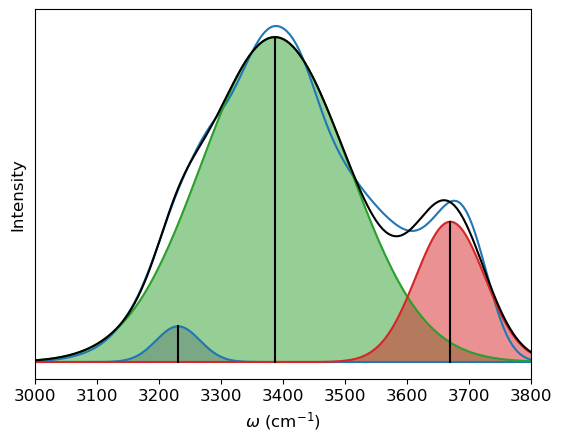

In [8]:
#Spectra within 2 A of interface

from scipy.optimize import curve_fit

plt.plot(collect[0], collect[1], c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (1*h1*np.exp(-((freq - f1)/w1)**2)
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], collect[1][300:], maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])




print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')
plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')









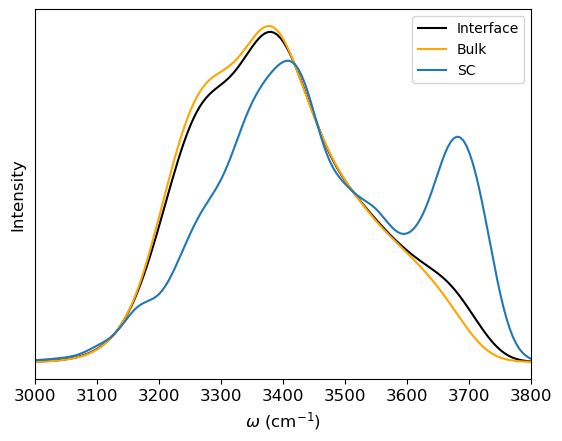

In [9]:
# SC spectra 
    
plt.plot(collect[0], collect[5], c='black', label='Interface') # Interface
plt.plot(collect[0], collect[4], c='orange', label='Bulk') #Bulk


xs = 0.88 #amount subtracted
sc = (collect[5] - xs*collect[4]) / (1-xs)
plt.plot(collect[0], sc, label='SC') # SC spectra
plt.xlim(3000, 3800)



plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)


noshift_spectra = np.array([collect[0], collect[4], collect[5], sc])
plt.legend()

[0.00000000e+00 1.27737555e-02 9.34670273e-03 3.20000000e+03
 3.40028505e+03 3.68042907e+03 2.00000000e+01 1.71451010e+02
 6.72652036e+01]


/Users/alacour/miniconda3/envs/open/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(-0.0011487788807329178, 0.016542415882554017)

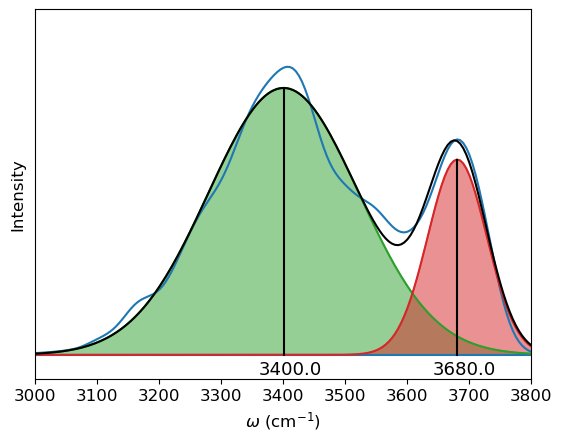

In [10]:
#Fitting SC spectra

from scipy.optimize import curve_fit

plt.plot(collect[0], sc, c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (0*h1*np.exp(-((freq - f1)/w1)**2) #Did not use first peak in Amoeba
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], sc[300:],  maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])





print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')

plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


plt.text(param[4]-40, -np.max(sc)/15, str(np.round(param[4])), fontsize=13)
plt.text(param[5]-40, -np.max(sc)/15, str(np.round(param[5])), fontsize=13)
#plt.text(param[3]-40, -np.max(sc)/15, str(np.round(param[3])), fontsize=13) Did not use this peak for Amoeba model



plt.ylim(-np.max(sc)/12, np.max(sc)*1.2)











In [11]:
vals = np.load("amoeba_spectra_wfield/vals.npy", allow_pickle=True) # Identifiers for 1) interfacial distance + 2) free OH.
allacts = np.load("amoeba_spectra_wfield/activities.npy", allow_pickle=True) # Raman ativities
allfreqs = np.load("amoeba_spectra_wfield/frequencies.npy", allow_pickle=True) # Raman Frequencies
allfields = np.load("amoeba_spectra_wfield/fields.npy", allow_pickle=True) # Fields used in specific Raman calculation

In [12]:


vs = [
      -2, #No free OH, x< 2 A of WCI
      98, #Free OH, x< 2 A of WCI
      2, #No free OH, 6 C >x> 2 A of WCI
      102, #Free OH, 6 C >x> 2 A of WCI
     6, #No free OH, 10 C >x> 6 A of WCI
      106, #Free OH, 10 C >x> 6 A of WCI
     196, #No free OH, bulk
     296, #Free OH, bulk
     200, #No free OH, bulk, more data
     300 #Free OH, bulk, more data
        ]

compute_free_OHs(vs, vals, allfields)

-2
98
2
102
6
106
196
296
200
300
Fraction of free OHs for x<2 A =  0.26028982823278857
Fraction of free OHs for 2<x<6 A =  0.025300577803280003
Fraction of free OHs for 6<x<10 A =  0.023024285522608344
Fraction of free OHs for Bulk Sample 1 =  0.02490640223189118
Fraction of free OHs for Bulk Sample 2 =  0.023713762631723104


0
1
2
3
4
5
6
7
8
9


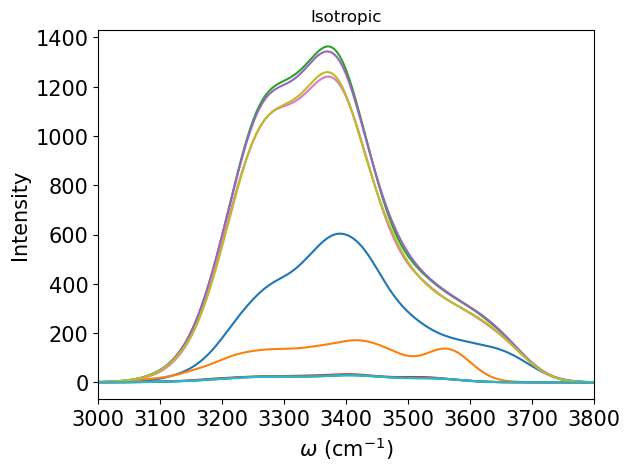

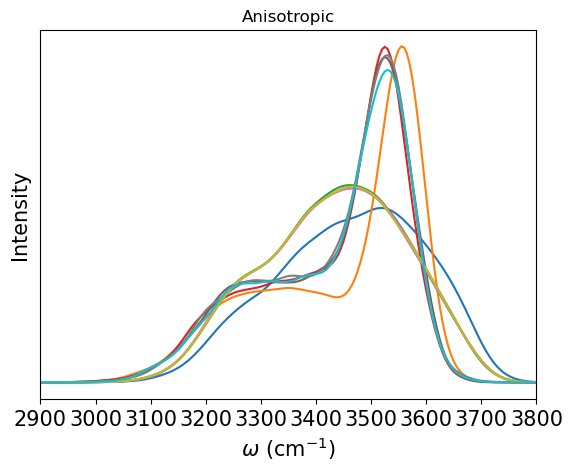

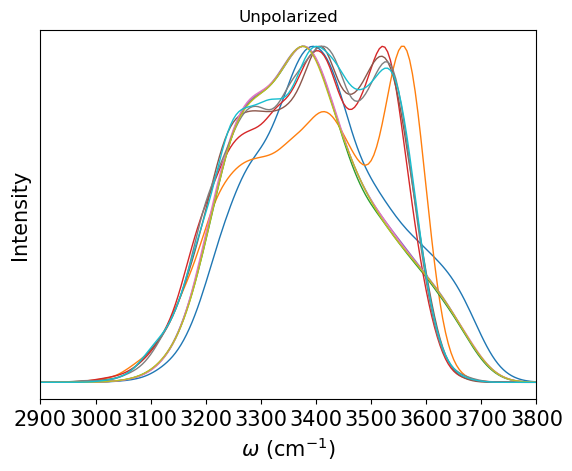

In [13]:
# Generating Isotropic, Anisotropic, and Unpolarized Raman from activities and frequencies

combos = sort_spectra(vs, vals, allfreqs, allacts)

Text(0, 0.5, 'Intensity')

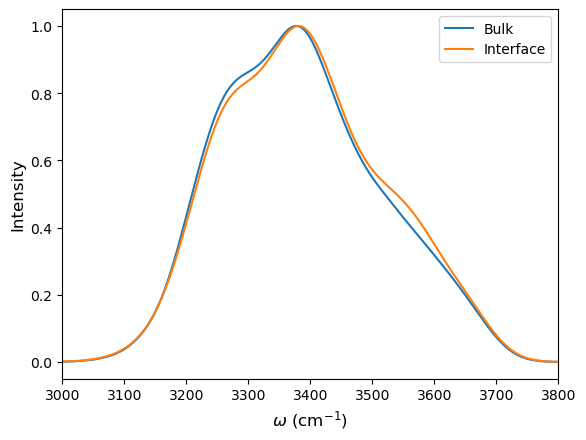

In [14]:

collect = [] # To this, I add 1) spectra by distance, 2) bulk spectra, and 3), Interface spectra. 

collect.append(combos[0][0])

for i in range(3):
    collect.append(combos[2*i][3] + combos[2*i+1][3])# Spectra by distance


collect.append(combos[6][3] + combos[7][3] + combos[8][3] + combos[9][3]) #Bulk
collect.append(combos[0][3] + 
               combos[1][3] + 
               combos[2][3] + 
               combos[3][3] + 
               combos[4][3] + 
               combos[5][3])#Interface


collect = np.array(collect)

plt.xlim(3000, 3800)
collect[1:] = (collect[1:].T / np.sum(collect[1:, 300:], axis=1)).T


labels = ['Bulk', 'Interface']

it = 0
for i in range(4, 6):
    plt.plot(collect[0], collect[i]/np.max(collect[i]), label=labels[it])
    it +=1
    
plt.legend()

plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)


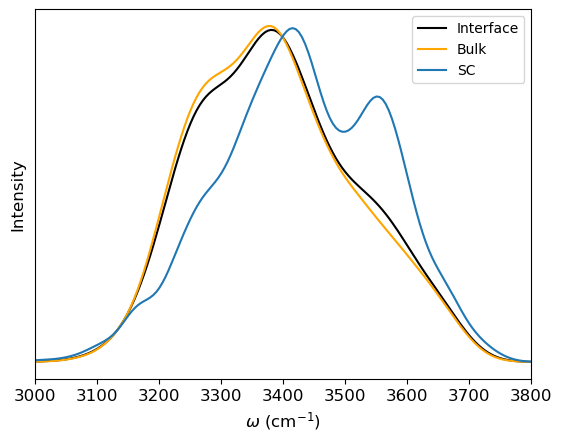

In [15]:
# SC spectra 
    
plt.plot(collect[0], collect[5], c='black', label='Interface') # Interface
plt.plot(collect[0], collect[4], c='orange', label='Bulk') #Bulk


xs = 0.88 #amount subtracted
sc = (collect[5] - xs*collect[4]) / (1-xs)
plt.plot(collect[0], sc, label='SC') # SC spectra
plt.xlim(3000, 3800)



plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)


noshift_spectra = np.array([collect[0], collect[4], collect[5], sc])


plt.legend()

[0.00000000e+00 1.38608571e-02 4.52603187e-03 3.20000000e+03
 3.41593884e+03 3.57817625e+03 2.00000000e+01 1.86726939e+02
 5.06947959e+01]


(-0.0012782500486153935, 0.018406800700061666)

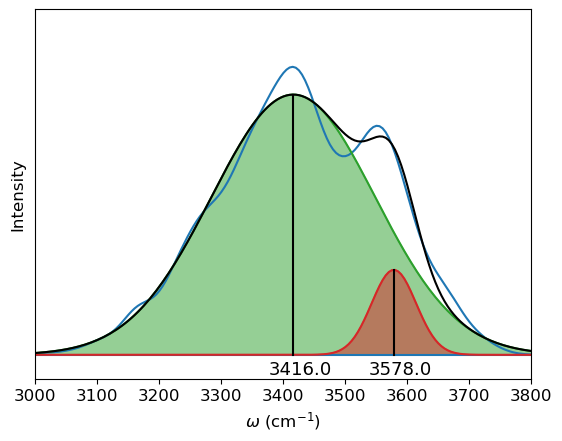

In [16]:
#Fitting SC spectra

from scipy.optimize import curve_fit

plt.plot(collect[0], sc, c='C0')

curve = lambda freq, h1, h2, h3, f1, f2, f3, w1, w2, w3: (0*h1*np.exp(-((freq - f1)/w1)**2) #Did not use first peak in Amoeba
                                              + h2*np.exp(-((freq - f2)/w2)**2)
                                              + h3*np.exp(-((freq - f3)/w3)**2))



plt.xlim(3000, 3800)

param, cov = curve_fit(curve, collect[0][300:], sc[300:],  maxfev= 10000, p0 = [0.000, 0.01, 0.005,
                                                    3200, 3400, 3600, 
                                                    20, 150, 50])





print(param)
xx = collect[0]
alterparam = np.copy(param)
alterparam[1:3] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy)
plt.fill_between(xx, yy, 0, color='C4', alpha = 0.5)
yy2 = np.copy(yy)

alterparam = np.copy(param)
alterparam[[0, 2]] = 0
yy = curve(xx, *alterparam)

yy1 = np.copy(yy)
plt.plot(xx, yy, c='C2')
plt.fill_between(xx, yy, 0, color='C2', alpha = 0.5)


alterparam = np.copy(param)
alterparam[:2] = 0
yy = curve(xx, *alterparam)

plt.plot(xx, yy, c='C3')

plt.fill_between(xx, yy, 0, color='C3', alpha = 0.5)


plt.xlabel('$\omega$ (cm$^{-1}$)', size=fs)
plt.ylabel('Intensity', size=fs)
plt.xticks(size=fs)
plt.yticks([], size=fs)
plt.plot(xx, yy1 + yy2 + yy, c='black')

plt.plot([param[4]]*2, [0, np.max(yy1)], c='black')
plt.plot([param[5]]*2, [0, np.max(yy)], c='black')
plt.plot([param[3]]*2, [0, np.max(yy2)], c='black')


plt.text(param[4]-40, -np.max(sc)/15, str(np.round(param[4])), fontsize=13)
plt.text(param[5]-40, -np.max(sc)/15, str(np.round(param[5])), fontsize=13)
#plt.text(param[3]-40, -np.max(sc)/15, str(np.round(param[3])), fontsize=13) Did not use this peak for Amoeba model



plt.ylim(-np.max(sc)/12, np.max(sc)*1.2)









